In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import binned_statistic
from os.path import exists

In [2]:
Msun_in_g = 1.989e33

UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e18 	# pc
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitMass_in_g = 1.989e31		# 0.01 solar masses
UnitMass_in_Msun = UnitMass_in_g / Msun_in_g

yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18
UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

In [3]:
def PrintKeysOfHDF5File(fileName, groupName = "PartType0"):
    with h5py.File(fileName+".hdf5") as f:
        print(f.keys())
        group = f.get(groupName)
        print(group.values())
        print(list(group.items()))
        print("\n\n")
        #print(dict(f["Header"].attrs.items())["MassTable"][1]) dm particle mass

def LoadDataFromHDFByFileName(fileName, dataName, groupName = "PartType0"):
    with h5py.File(fileName +".hdf5", "r") as hdf:
        data = np.array(hdf.get(groupName+"/"+dataName))
    return data

def LoadDataFromHDF(folder, timeStep, dataName, groupName = "PartType0"):
    with h5py.File(folder+"/snap_"+str(timeStep).zfill(3) +".hdf5", "r") as hdf:
        data = np.array(hdf.get(groupName+"/"+dataName))
    return data



def CheckData(fileName, dataName, groupName = "PartType0"):
    data = LoadDataFromHDFByFileName(fileName, dataName, groupName)
    print("len("+dataName+"): " + str(len(data)))
    nanCount = 0
    
    data = np.reshape(data, -1)
    for i in range(len(data)):
        if(np.isnan(data[i])):
            nanCount += 1
        elif(data[i] == 104625):
            print("found ID")
            
    

    print("nan count: " + str(nanCount))
    print("max value: " + str(np.max(data[np.where(np.isnan(data) != True)])))
    print("min value: " + str(np.min(data[np.where(np.isnan(data) != True)])))
    if(len(data[np.where(data > 0)]) != 0):
        print("min value > 0: " +str(np.min(data[np.where(data > 0)])))

In [7]:
folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/ICs_0_1x_settled_no_refinement_no_outflow/"
fileName = "snap_300"
#folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/runs_settled_no_refinement_ICs/sE_10x_new_boost_10/"

PrintKeysOfHDF5File(folder+fileName, "PartType0")
#PrintKeysOfHDF5File(folder+fileName, "PartType4")
file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
masses = f1['PartType0/Masses']
print(np.sum(masses) * UnitMass_in_Msun)


folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/ICs_1x_settled_no_refinement_no_outflow/"
fileName = "snap_300"
#folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/runs_settled_no_refinement_ICs/sE_10x_new_boost_10/"

PrintKeysOfHDF5File(folder+fileName, "PartType0")
#PrintKeysOfHDF5File(folder+fileName, "PartType4")
file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
masses = f1['PartType0/Masses']
print(np.sum(masses) * UnitMass_in_Msun)

folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/ICs_10x_settled_no_refinement_no_outflow/"
fileName = "snap_300"
#folder = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/runs_settled_no_refinement_ICs/sE_10x_new_boost_10/"

PrintKeysOfHDF5File(folder+fileName, "PartType0")
#PrintKeysOfHDF5File(folder+fileName, "PartType4")
file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
masses = f1['PartType0/Masses']
print(np.sum(masses) * UnitMass_in_Msun)

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType1']>
ValuesViewHDF5(<HDF5 group "/PartType0" (6 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (9971, 3), type "<f4">), ('Density', <HDF5 dataset "Density": shape (9971,), type "<f4">), ('InternalEnergy', <HDF5 dataset "InternalEnergy": shape (9971,), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (9971,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (9971,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (9971, 3), type "<f4">)]



0.005116297602653502
<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType1']>
ValuesViewHDF5(<HDF5 group "/PartType0" (6 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (53732, 3), type "<f4">), ('Density', <HDF5 dataset "Density": shape (53732,), type "<f4">), ('InternalEnergy', <HDF5 dataset "InternalEnergy": shape (53732,), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (53732,), type

In [13]:
4.9e11 / 5e5

980000.0

In [4]:
folder = "/vera/u/xboecker/run/4_galaxy/1_ICs_from_isolated_galaxy_example_modified/"
fileName = "ICs_with_PartType0"
PrintKeysOfHDF5File(folder+fileName, "PartType3")
CheckData(folder+fileName, "Masses", "PartType3")

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']>
ValuesViewHDF5(<HDF5 group "/PartType3" (4 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (100000, 3), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (100000,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (100000,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (100000, 3), type "<f4">)]
len(Masses): 100000
nan count: 0
max value: 9.29828e-05
min value: 9.29828e-05
min value > 0: 9.29828e-05


### Move particles

In [49]:
# move all particles to positive coordinates
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_no_densities_no_0_masses_no_BH_no_0_E"

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
coos = f1['PartType0/Coordinates']       # load the data
newCoos = LoadDataFromHDFByFileName(file_name, "Coordinates") + 10 # just execute the addition once!
coos[:] = newCoos                      # assign new values to data
print(coos)
print(newCoos)
f1.close()

<HDF5 dataset "Coordinates": shape (52682, 3), type "<f4">
[[ 1.4017982 89.86272   49.0346   ]
 [ 1.4017982 89.86272   42.229916 ]
 [ 8.206485  89.86272   42.229916 ]
 ...
 [45.525932  50.4168    52.117973 ]
 [45.313286  50.4168    52.117973 ]
 [45.366447  50.36364   52.38378  ]]


### Change all masses

In [19]:
# change mass of particles
galaxyMass = 1e12 * Msun_in_g / UnitMass_in_g

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
masses = f1['PartType0/Masses']
particleMass = 100 #galaxyMass / len(masses[:])
newMasses = np.full(len(masses[:]), particleMass)
print(newMasses)
masses[:] = newMasses
f1.close()

[100 100 100 ... 100 100 100]


### Copy Coordinates

In [17]:
folderToCopy = "/vera/u/xboecker/run/4_galaxy/0_test_MakeDisk_ICs/"
fileToCopy = "IC_with_grid_galaxy_params_nothing_changed"
#CheckData(initialFolder+initialFileName, "Coordinates")
coosToCopy = LoadDataFromHDFByFileName(folderToCopy+fileToCopy, "Coordinates")
print(coosToCopy)

folder = "/vera/u/xboecker/run/4_galaxy/2_scale_SN_cluster/"
fileName = "IC_add_coos"

coos = LoadDataFromHDFByFileName(folder+fileName, "Coordinates")
print(coos)

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
coos = f1['PartType0/Coordinates']
newCoos = coosToCopy
coos[:] = newCoos
f1.close()

coos = LoadDataFromHDFByFileName(folder+fileName, "Coordinates")
print(coos)

[[ 3.401802 91.86281  51.034653]
 [ 3.401802 91.86281  44.22996 ]
 [10.206495 91.86281  44.22996 ]
 ...
 [47.52598  52.416855 54.11803 ]
 [47.313335 52.416855 54.11803 ]
 [47.366497 52.363693 54.38384 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 3.40180206 91.86280823 51.03465271]
 [ 3.40180206 91.86280823 44.2299614 ]
 [10.20649529 91.86280823 44.2299614 ]
 ...
 [47.5259819  52.41685486 54.11803055]
 [47.31333542 52.41685486 54.11803055]
 [47.36649704 52.36369324 54.38383865]]


### Change specific values

In [ ]:
# remove nan's from density
file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
densities = f1['PartType0/Density']
for i in range(len(densities)):
    if(np.isnan(densities[i])):
        densities[i] = 0

f1.close()

In [15]:
# remove negatives's from density and set to min value of previous densities
file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
densities = f1['PartType0/Density']
for i in range(len(densities)):
    if(densities[i] < 0):
        densities[i] = 0

f1.close()

In [5]:
# remove 0's and set new value
def SetSpecificValuesTo(file_name, dataName, newValue, changeMinValues = False, oldValue = 0):
    f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
    data = f1['PartType0/'+dataName]
    zeroCount = 0
    
    if(changeMinValues):
        oldValue = np.min(data)
    
    for i in range(len(data)):
        if(data[i] == oldValue):
            data[i] = newValue
            zeroCount += 1
    print(f"zeroCount: {zeroCount}")

    f1.close()

In [14]:
# remove 0's from density and set a bit below previous min value
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E"

SetSpecificValuesTo(folder+fileName, "Masses", 1e-16, True, oldValue = 1e-15)
CheckData(folder+fileName, "Masses")

zeroCount: 3863
len(Masses): 52682
max value: 0.00014035159
min value: 1e-16
min value > 0: 1e-16


In [24]:
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E"
CheckData(folder+fileName, "Density")

len(Density): 52682
nan count: 3552
max value: 1776839800000000.0
min value: -2044280100000000.0
min value > 0: 0.0042107897


In [13]:
# give BG lots of energy (high temperature)
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E"

SetSpecificValuesTo(folder+fileName, "InternalEnergy", 200000, oldValue = 20000)
CheckData(folder+fileName, "InternalEnergy")

zeroCount: 3863
len(InternalEnergy): 52682
max value: 200000.0
min value: 210.48248
min value > 0: 210.48248


### Delete group

In [25]:
# delete density group from file
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E_no_densities"

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
del f1['PartType0/Density']

f1.close()

In [27]:
# delete partType5
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_no_densities_no_0_masses_no_BH"

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
del f1['PartType5']
f1.close()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType5']>
[('Coordinates', <HDF5 dataset "Coordinates": shape (52682, 3), type "<f4">), ('InternalEnergy', <HDF5 dataset "InternalEnergy": shape (52682,), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (52682,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (52682,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (52682, 3), type "<f4">)]
<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>
[('Coordinates', <HDF5 dataset "Coordinates": shape (52682, 3), type "<f4">), ('InternalEnergy', <HDF5 dataset "InternalEnergy": shape (52682,), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (52682,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (52682,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (52682, 3), type "<f4">)]


### Add group

In [62]:
# add new group to file
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_no_densities_no_0_masses_no_BH_no_0_E"

file_name = folder+fileName
f1 = h5py.File(file_name+".hdf5", 'r+')     # open the file
f1.create_dataset("PartType5", data=[])     # nicht gut: gibt error can't open file wenn nix drin ist in data

f1.close()

### Copy group

In [29]:
# copy group from other hdf5 file
folder = "/vera/u/xboecker/run/4_galaxy/2_scale_SN_cluster/"
fileName = "IC_add_coos"

initialFolder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
initialFileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E_no_densities"

PrintKeysOfHDF5File(folder+fileName, "PartType1")
print("\n")
PrintKeysOfHDF5File(initialFolder+initialFileName, "PartType0")
print("\n")

def DoCopy():
    with h5py.File(folder+fileName+".hdf5",'w') as f_dest:
        with h5py.File(initialFolder+initialFileName+".hdf5",'r') as f_src:
                f_src.copy(f_src["PartType0"],f_dest["./"],"PartType0")
                
DoCopy()

PrintKeysOfHDF5File(folder+fileName, "PartType0")

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']>
ValuesViewHDF5(<HDF5 group "/PartType1" (4 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (100000, 3), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (100000,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (100000,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (100000, 3), type "<f4">)]


<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType5']>
ValuesViewHDF5(<HDF5 group "/PartType0" (5 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (52682, 3), type "<f4">), ('InternalEnergy', <HDF5 dataset "InternalEnergy": shape (52682,), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (52682,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (52682,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (52682, 3), type "<f4">)]


<KeysViewHDF5 ['PartType0']>
ValuesViewHDF5(<HDF5 gr

In [6]:

folder = "/vera/u/xboecker/run/4_galaxy/isolated_galaxy_collisionless_3d/output/"
fileName = "snap_000"

PrintKeysOfHDF5File(folder+fileName, "PartType1")

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']>
ValuesViewHDF5(<HDF5 group "/PartType1" (4 members)>)
[('Coordinates', <HDF5 dataset "Coordinates": shape (100000, 3), type "<f4">), ('Masses', <HDF5 dataset "Masses": shape (100000,), type "<f4">), ('ParticleIDs', <HDF5 dataset "ParticleIDs": shape (100000,), type "<u4">), ('Velocities', <HDF5 dataset "Velocities": shape (100000, 3), type "<f4">)]


### Make Movie

In [ ]:
def LoadDataFromHDF(folder, timeStep, dataName, groupName = "PartType0"):
    with h5py.File(folder+"/snap_"+str(timeStep).zfill(3) +".hdf5", "r") as hdf:
        data = np.array(hdf.get(groupName+"/"+dataName))
    return data

In [1]:
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/output/"
folder = "/vera/u/xboecker/run/4_galaxy/isolated_galaxy_collisionless_3d/output/"
folder = "/vera/u/xboecker/run/4_galaxy/2_scale_SN_cluster/output/"
folder = "/vera/u/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/output_no_cooling_or_SFR/"

frameAmount = 301
#timeStep = 50

boxSize = 500

for timeStep in range(frameAmount):
    #data = LoadDataFromHDF(folder, timeStep, "Coordinates", "PartType1")
    with h5py.File(folder+"snap_"+str(timeStep).zfill(3) +".hdf5", "r") as hdf:
            data = np.array(hdf.get("PartType1"+"/"+"Coordinates"))
    dataX = np.zeros(len(data))
    dataY = np.zeros(len(data))
    dataZ = np.zeros(len(data))

    for i in range(len(data)):
        dataX[i] = data[i,0]
        dataY[i] = data[i,1]
        dataZ[i] = data[i,2]


    fig, ax = plt.subplots(figsize = (100,100))
    
    

    ax.set_aspect(1)

    #ax.scatter(dataX, dataY, marker=".")
    ax.hist2d(dataX, dataY, bins=200, range = [[0, 200],[0,200]])
    
    plt.savefig("plots/galaxyHist2d_run_diskIC_wdm"+str(timeStep).zfill(3))

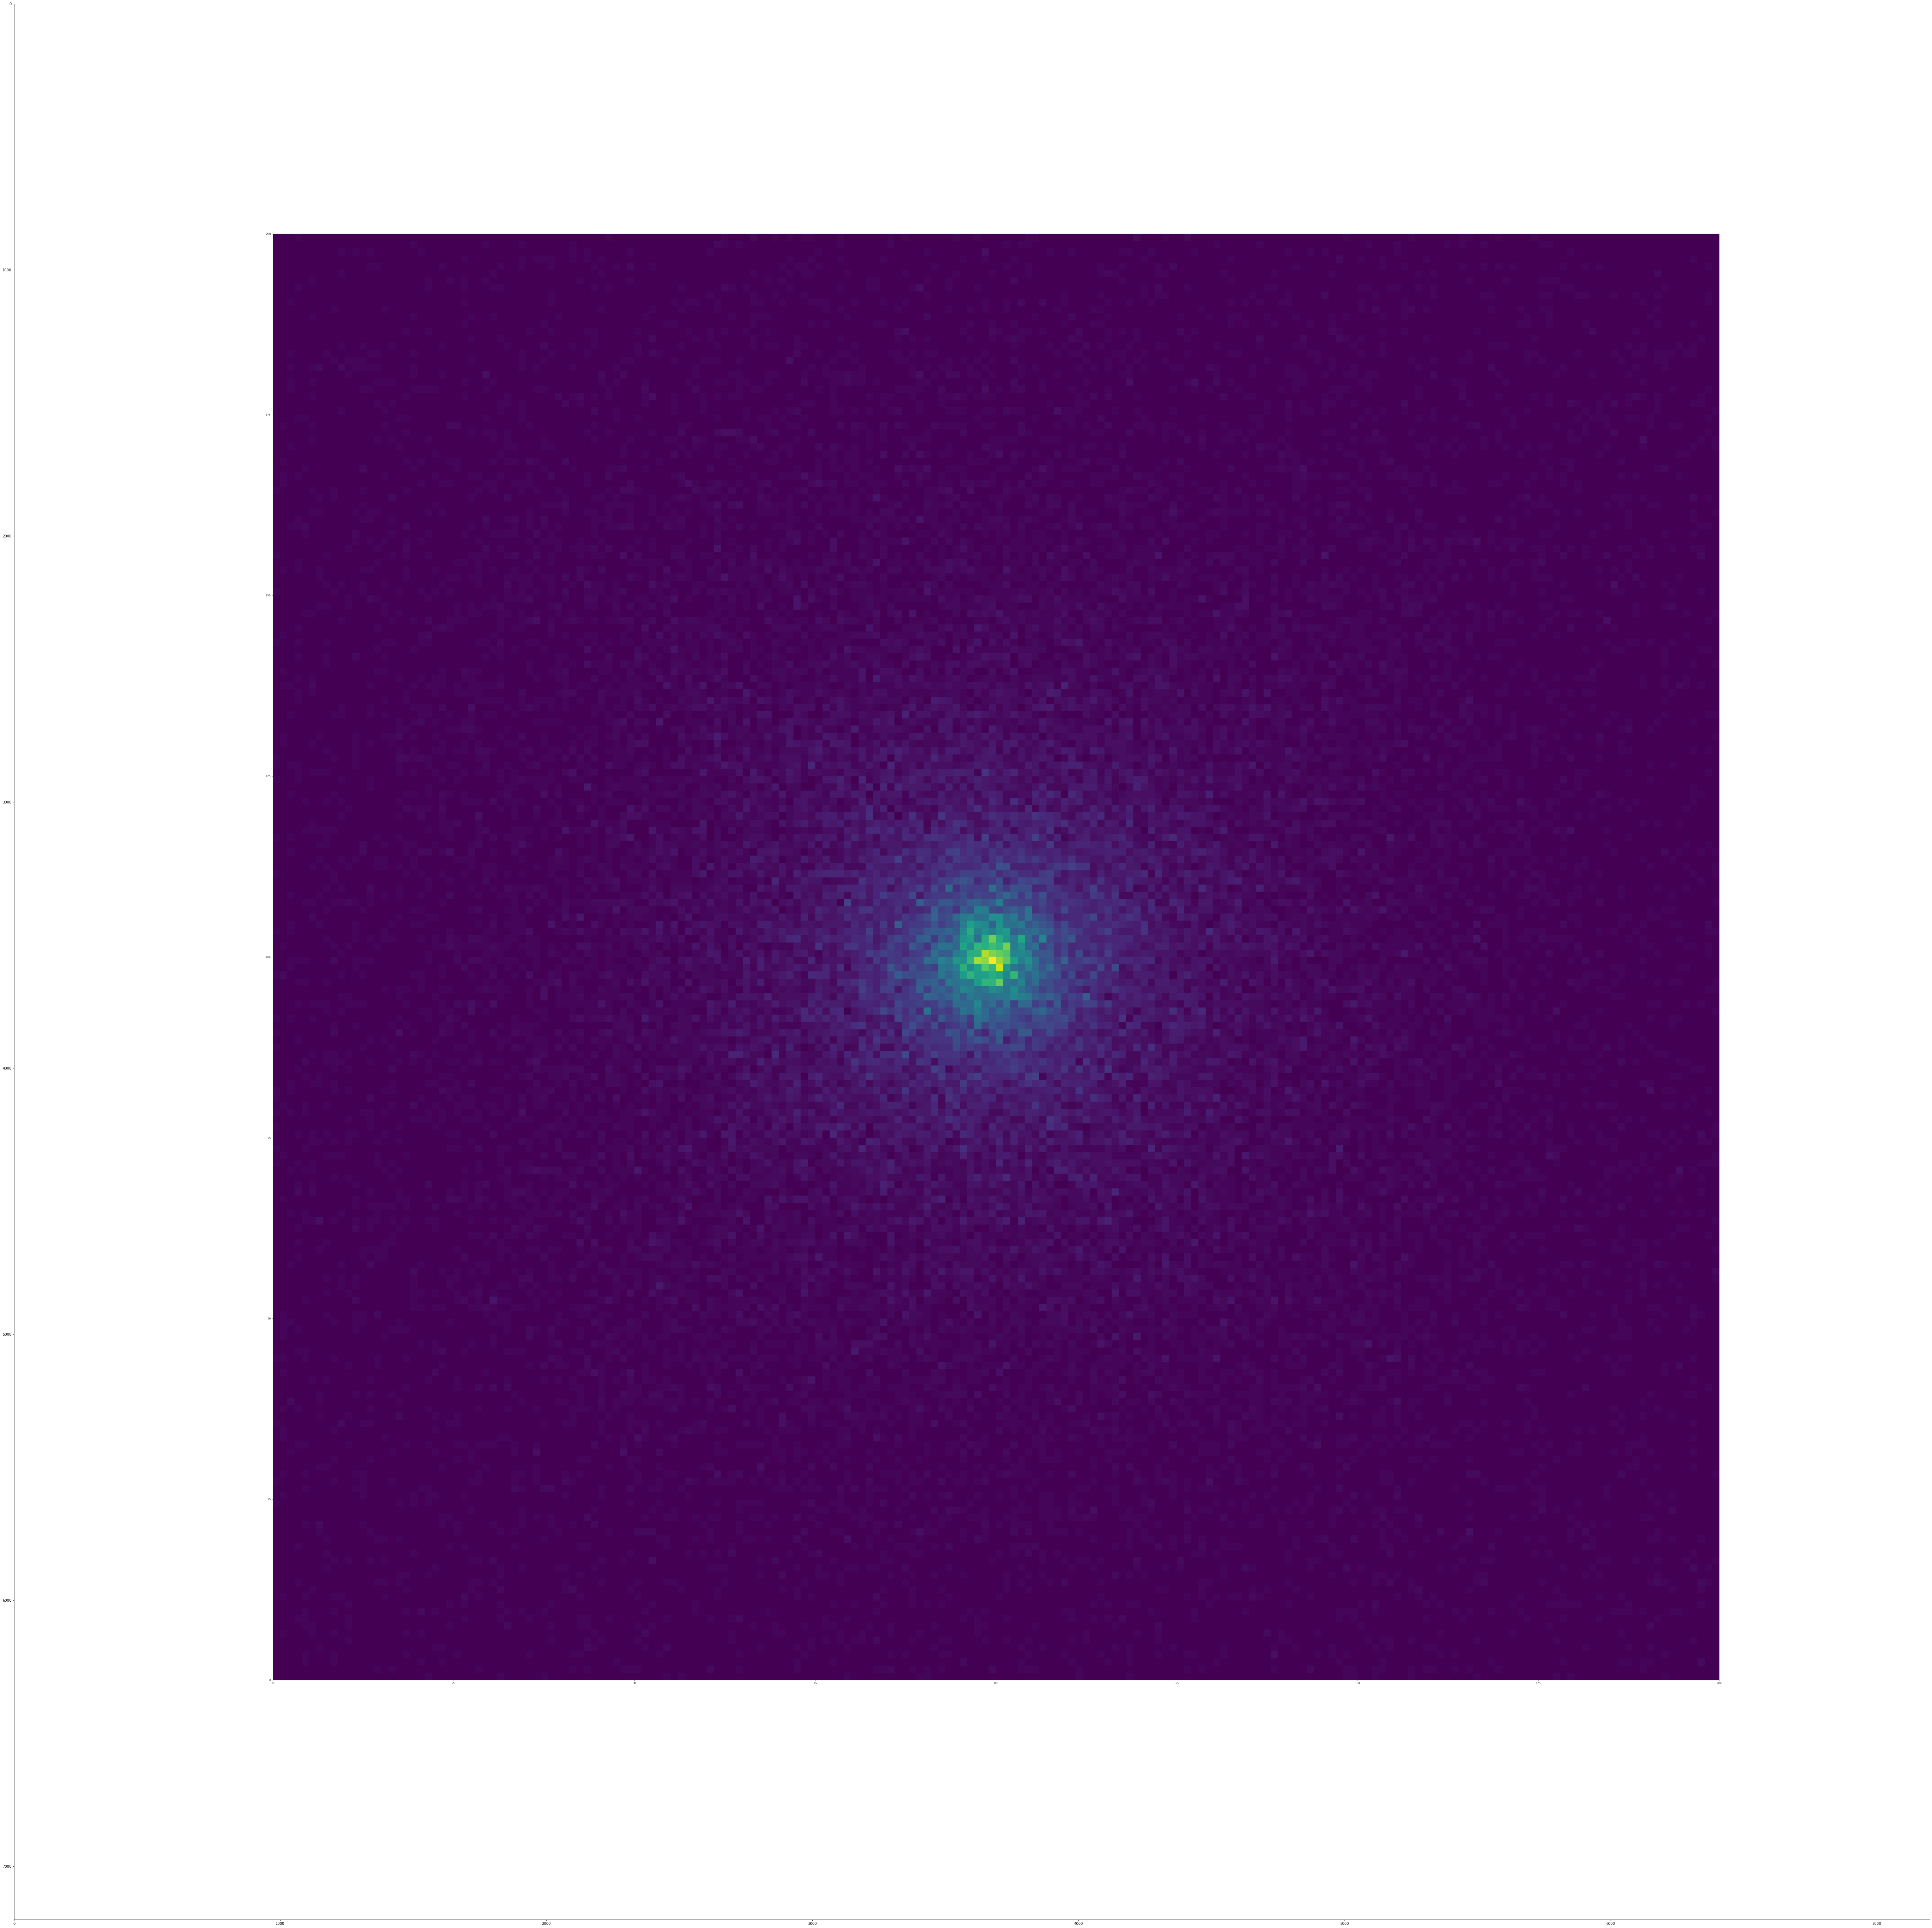

In [11]:
import matplotlib.animation as animation
import matplotlib.image as mpimg

folder = "/vera/u/xboecker/run/4_galaxy/2_scale_SN_cluster/output/"
folder = "/vera/u/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/output_no_cooling_or_SFR/"

frameAmount = 301

fig, ax = plt.subplots(figsize = (100,100))
#plt.axis([0, 400, 0, 300])


def animate(timeStep):
    print(timeStep)
    plt.clf()
    img = mpimg.imread("plots/galaxyHist2d_run_diskIC_wdm"+str(timeStep).zfill(3)+".png")
    plt.imshow(img)
anim = animation.FuncAnimation(fig, animate,
                               frames=frameAmount)#,
                               #interval=5,
                               #repeat=False)

f = r"plots/galaxyHist2d_run_diskIC_wdm.gif" 
writergif = animation.PillowWriter(fps=10) 
anim.save(f, writer=writergif)

plt.show()

In [9]:
from moviepy.editor import *
frameAmount = 12
clips = []
for i in range(frameAmount):
    clip = ImageClip("plots/galaxyScatter_"+str(timeStep).zfill(3)+".png").set_duration(i+2)
    clips.append(clip)
video_clip = concatenate_videoclips(clips, method="compose")
video_clip.write_videofile("galaxyScatterVideo.mp4", fps = 1)

ModuleNotFoundError: No module named 'moviepy'

In [10]:
import cv2

ModuleNotFoundError: No module named 'cv2'

### Make single scatter plots

In [10]:
folder = "/vera/u/xboecker/run/4_galaxy/0_test_GalIC_ICs/"
fileName = "IC_with_grid_galaxy_params_no_0_masses_no_0_E"

data = LoadDataFromHDFByFileName(folder+fileName, "Coordinates")

In [11]:
dataX = np.zeros(len(data))
dataY = np.zeros(len(data))
dataZ = np.zeros(len(data))

for i in range(len(data)):
    dataX[i] = data[i,0]
    dataY[i] = data[i,1]
    dataZ[i] = data[i,2]

(0.0, 110.0)

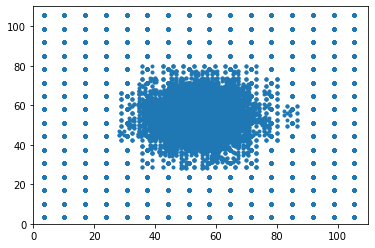

In [12]:
plt.scatter(dataX, dataY, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

(0.0, 110.0)

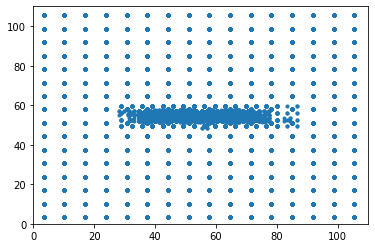

In [27]:
plt.scatter(dataX, dataZ, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

(0.0, 110.0)

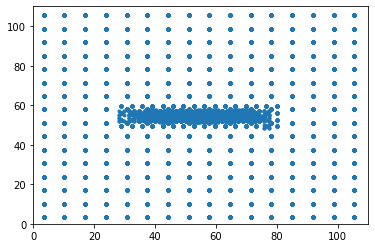

In [28]:
plt.scatter(dataY, dataZ, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

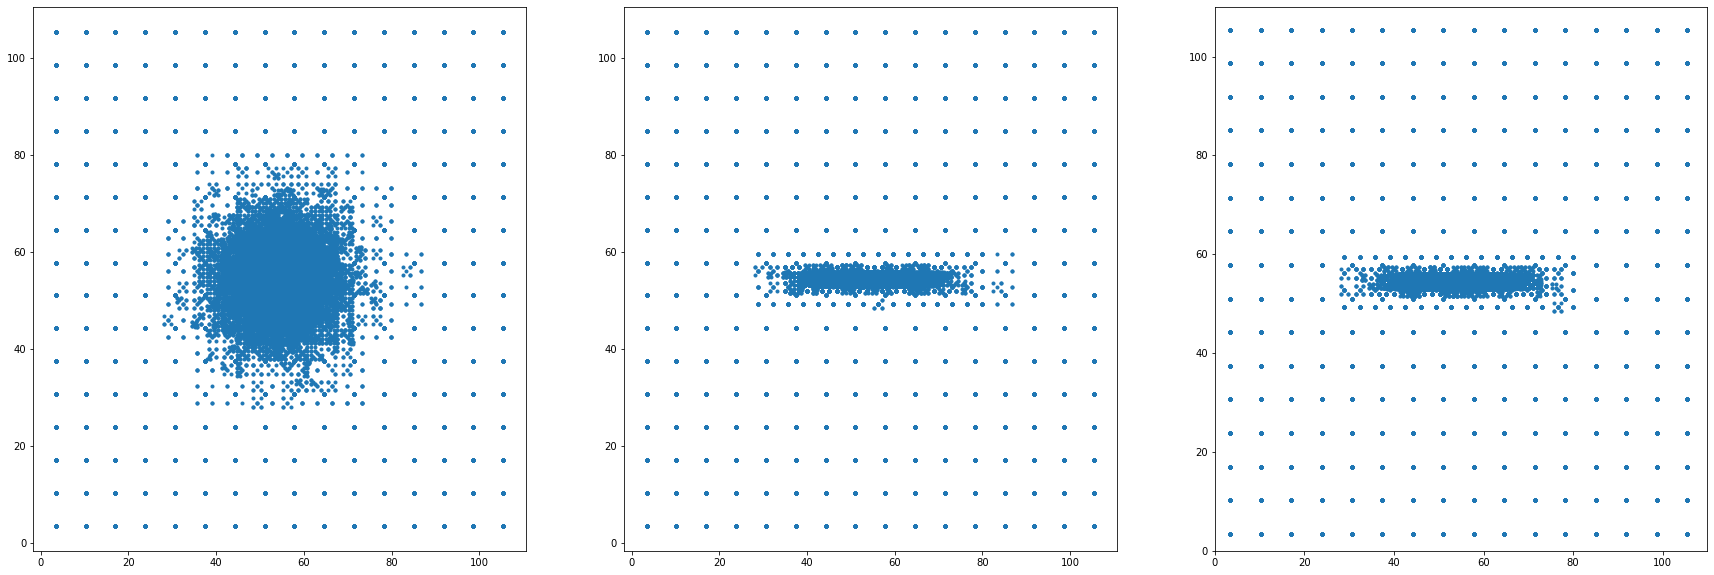

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))

axs[0].scatter(dataX, dataY, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

axs[1].scatter(dataX, dataZ, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

axs[2].scatter(dataY, dataZ, marker=".")
plt.xlim(0, 110)
plt.ylim(0, 110)

plt.savefig("plots/galaxy_ICs_with_BG_Mesh")

plt.show()